In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering
import hdbscan
# Dim reduction
from sklearn.manifold import TSNE
# Summarization


# src
from src.embed import get_embeddings

In [2]:
filepath = "C:\\Users\\hlmq\\OneDrive - Chevron\\Desktop\\Projects\\Tech Abstracts\\data\\data-wordclouds\\"
filename = "2023_all_abstracts.txt"

df = pd.read_csv(str(filepath)+str(filename))

In [3]:
## VARIABLES

TEXT_FIELD = "clean_abstract"

In [4]:
del df['Unnamed: 0']

In [5]:
df.head()

,clean_abstract
0,methane emission reductions near-term greenhou...
1,embed discrete fracture ( edfm ) proprietary f...
2,aim leverage strengths deliver affordable reli...
3,tech center pe stakeholders 7 units successful...
4,deployment fit-for-purpose technology-driven s...


## Embed Text

In [6]:
# Generate embeddings
abstracts = df[TEXT_FIELD].to_list()
embeddings = get_embeddings(abstracts)

## Cluster Text

In [7]:
hdb = hdbscan.HDBSCAN(min_samples=2, min_cluster_size=2).fit(embeddings)

hdb.fit(embeddings)

HDBSCAN(min_cluster_size=2, min_samples=2)

In [19]:
df['Cluster Label'] = hdb.labels_
df['Cluster Label'].value_counts()

 0    72
-1    36
 1     2
Name: Cluster Label, dtype: int64

## Reduce Embedding Dimensions

In [12]:
tsne = TSNE(
    n_components=2,
    perplexity=50,
    n_iter=1000,
    init = "pca",
    random_state = 123
)
reduced_embeddings = tsne.fit_transform(embeddings)

c:\ProgramData\Miniconda3\envs\nlp_cluster\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\ProgramData\Miniconda3\envs\nlp_cluster\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [15]:
reduced_embeddings[:,0]

array([ 4.27394420e-01, -6.24759674e-01, -9.27639902e-02,  1.97117364e+00,
       -1.97288200e-01,  1.34472859e+00,  1.86154842e+00, -2.12776870e-01,
        2.87934732e+00,  2.88501215e+00,  3.46690631e+00,  2.97690105e+00,
        4.00023794e+00,  2.07449347e-01,  4.65621471e+00,  3.11710310e+00,
       -5.26220381e-01,  2.27910256e+00,  1.03436232e+00,  3.16973281e+00,
        3.10125303e+00,  3.48498178e+00,  4.44205731e-01,  2.91644835e+00,
        1.56740463e+00,  4.14048815e+00,  3.06616282e+00,  1.12059104e+00,
       -1.08610466e-01,  1.88568389e+00,  1.19310915e+00,  2.01340139e-01,
        1.37467206e+00,  5.28189480e-01, -1.17823243e+00, -1.13381386e+00,
       -1.04252827e+00, -1.77770969e-04,  1.08536057e-01,  1.44187021e+00,
        2.03803182e+00,  1.87157977e+00, -1.71114159e+00,  1.71050954e+00,
        4.09153318e+00,  1.83929920e+00, -6.63765669e-02, -3.24256033e-01,
        3.60503340e+00, -8.55002582e-01, -6.49778992e-02,  1.02774791e-01,
        2.21783713e-01, -

c:\ProgramData\Miniconda3\envs\nlp_cluster\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: >

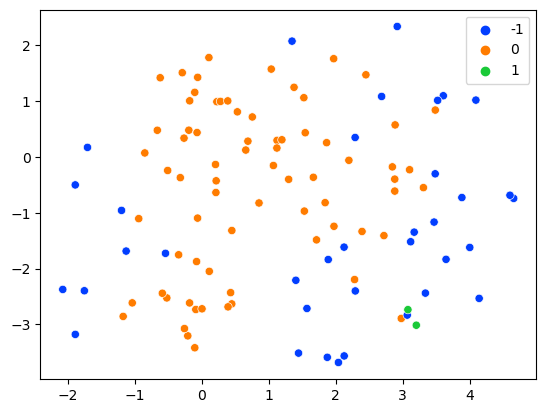

In [18]:
sns.scatterplot(reduced_embeddings[:,0], reduced_embeddings[:,1], hue=hdb.labels_, legend='full', palette="bright")

## Summarize Clusters

In [ ]:
df.head()

In [ ]:
df['Cluster Label'].value_counts()

## Visualize Plot